---

**<font size=6>Classification task: RandomForest</font>**


Classification demo code with RandomForest on Iris dataset.

- [sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)
- https://scikit-learn.org/stable/

In [2]:
import numpy as np
import pandas as pd

import sklearn
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/site-packages/matplotlib/__init__.py:1003: UserWarning: Duplicate key in file "/Users/uchiumi/.matplotlib/matplotlibrc", line #2
  (fname, cnt))


In [3]:
print("Sklearn :", sklearn.__version__)
print("Numpy :", np.__version__)
print("Pandas :", pd.__version__)

Sklearn : 0.20.2
Numpy : 1.16.1
Pandas : 0.24.2


### Load iris dataset

In [4]:
# Load datset
iris = load_iris()
print(dir(iris))

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']


In [5]:
# Description of iris dataset
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
# Names target flower
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [7]:
df_target = pd.DataFrame(iris.target, columns=["target"])
df_target.loc[df_target['target'] == 0, 'target_name'] = "setosa"
df_target.loc[df_target['target'] == 1, 'target_name'] = "versicolor"
df_target.loc[df_target['target'] == 2, 'target_name'] = "virginica"
df_feature = pd.DataFrame(iris.data, columns=iris.feature_names)
df = pd.concat([df_target, df_feature], axis=1)

df.head()

,target,target_name,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,setosa,5.1,3.5,1.4,0.2
1,0,setosa,4.9,3.0,1.4,0.2
2,0,setosa,4.7,3.2,1.3,0.2
3,0,setosa,4.6,3.1,1.5,0.2
4,0,setosa,5.0,3.6,1.4,0.2


In [8]:
df.describe()

,target,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,1.000000,5.843333,3.057333,3.758000,1.199333
std,0.819232,0.828066,0.435866,1.765298,0.762238
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,0.000000,5.100000,2.800000,1.600000,0.300000
50%,1.000000,5.800000,3.000000,4.350000,1.300000
75%,2.000000,6.400000,3.300000,5.100000,1.800000
max,2.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
target               150 non-null int64
target_name          150 non-null object
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [10]:
df.isnull().sum()

target               0
target_name          0
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

#### Pairplot

In [11]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

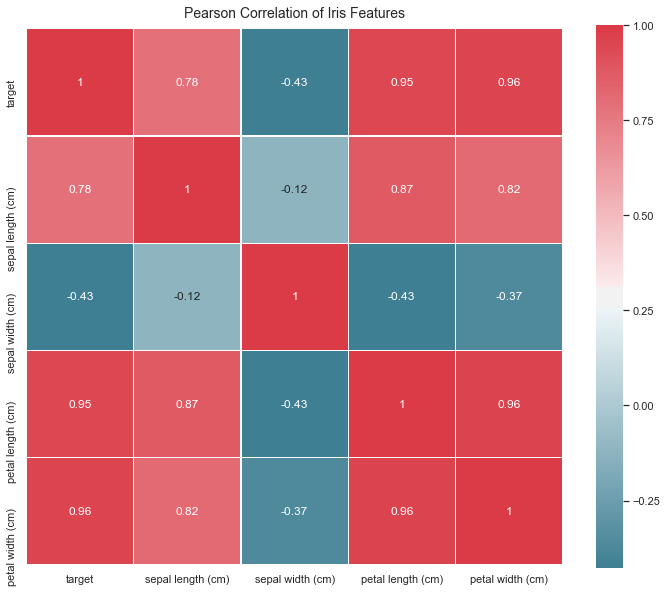

In [12]:
# Correlation matrix

sns.set()
cols = ['target', 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] # プロットしたい特徴量

plt.figure(figsize=(12,10))
plt.title('Pearson Correlation of Iris Features', y=1.01, fontsize=14)
sns.heatmap(df[cols].astype(float).corr(), 
            linewidths=0.1,
            vmax=1.0, 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,
            linecolor='white', 
            annot=True)

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


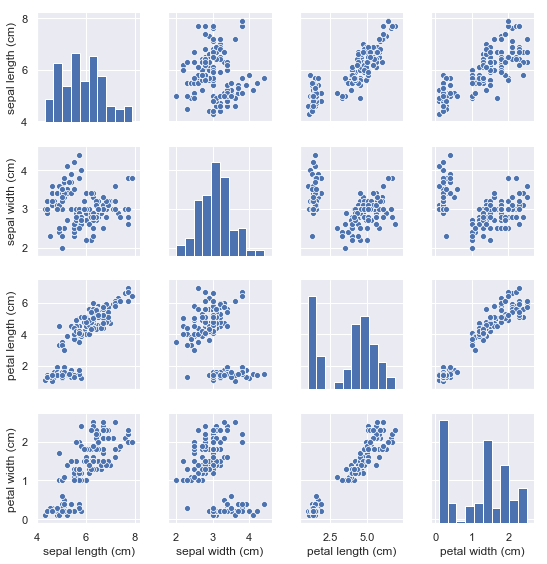

In [13]:
# pairplot 
sns.set()
cols = iris.feature_names # プロットしたい特徴量
sns.pairplot(df[cols], diag_kind='hist', size=2.0)
plt.show()

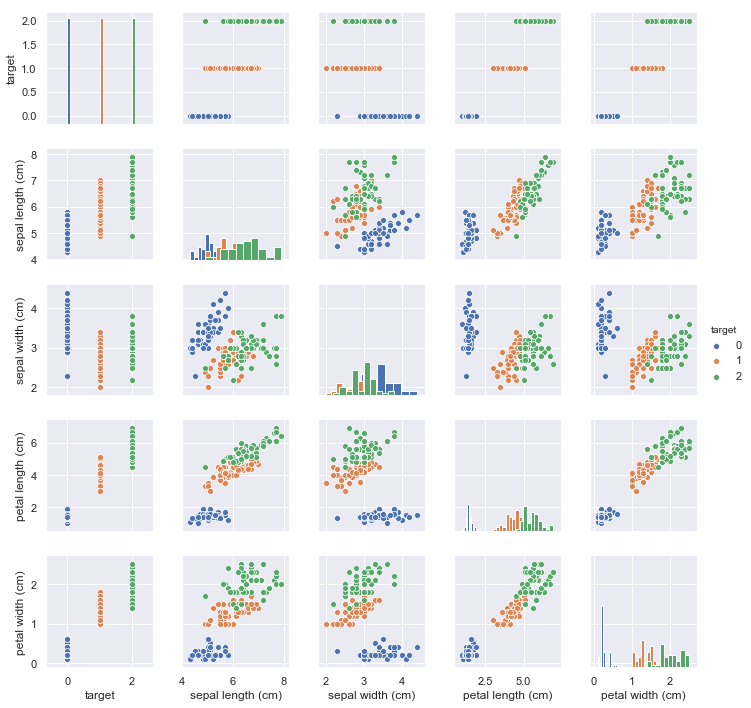

In [14]:
# pairplot per "target"
sns.set()
cols = ['target', 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] # プロットしたい特徴量
sns.pairplot(df[cols], hue='target', diag_kind='hist', size=2.0)
plt.show()

#### PCA on features

In [14]:
def plot_pca_scatter(X, y):
    # PCA
    pca = PCA(n_components=2)
    pca.fit(X)

    # Assign X_pca to the transformed X
    X_pca = pca.fit_transform(X)

    # Scatter plot (2D-PCA)
    sns.set()
    fig = plt.figure(figsize=(8, 6))
    for target in np.unique(y):
        plt.scatter(X_pca[y == target, 0], X_pca[y == target, 1], label='target={}'.format(target))
    plt.title('PCA on iris features (N={})'.format(X.shape[0]), fontsize=14)
    plt.xlabel('pc1')
    plt.ylabel('pc2')
    plt.legend(loc='lower right')
    return fig

In [15]:
# target and features
y = iris.target
X = iris.data

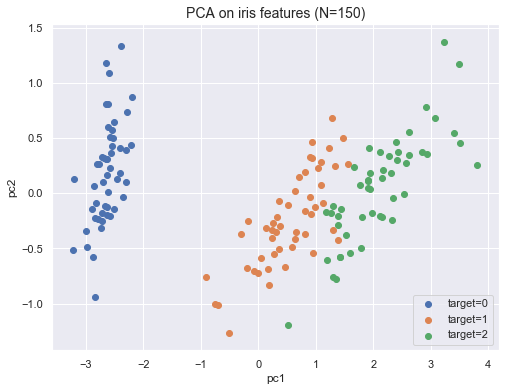

In [16]:
fig = plot_pca_scatter(X, y)

There are some kind of linear structure in data samples via target classes in PCA transformed space. <br>
So we can choose some linear models for classification.

### train/val split

In [17]:
X = iris.data
y = iris.target

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
print("train size :", X_train.shape[0])
print("test size  :", X_test.shape[0])

train size : 120
test size  : 30


### Fit RandomForest model

In [20]:
clf_rf = RandomForestClassifier(bootstrap=True, 
                                class_weight=None, 
                                criterion='gini',
                                max_depth=None, 
                                max_features='auto', 
                                max_leaf_nodes=None,
                                min_impurity_decrease=0.0, 
                                min_impurity_split=None,
                                min_samples_leaf=1, 
                                min_samples_split=2,
                                min_weight_fraction_leaf=0.0, 
                                n_estimators=10, 
                                n_jobs=None,
                                oob_score=False, 
                                random_state=None, 
                                verbose=0,
                                warm_start=False)

In [21]:
# fit
clf_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
# predictions
y_train_pred = clf_rf.predict(X_train)
y_test_pred = clf_rf.predict(X_test)

In [23]:
# Accuracy
acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)
print('Accuracy (train)  : {:>.4f}'.format(acc_train))
print('Accuracy (test)   : {:>.4f}'.format(acc_test))

Accuracy (train)  : 1.0000
Accuracy (test)   : 1.0000


### Confusion matrix

In [24]:
def print_confusion_matrix(confusion_matrix, class_names, plt_title='Confusion matrix: ', cmap='BuGn', figsize = (6.25, 5), fontsize=10):
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    fig = plt.figure(figsize=figsize)
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap=cmap)
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(plt_title, fontsize=fontsize*1.25)
    return fig

In [25]:
# Confusion matrix
cmat_train = confusion_matrix(y_train, y_train_pred)
cmat_test = confusion_matrix(y_test, y_test_pred)

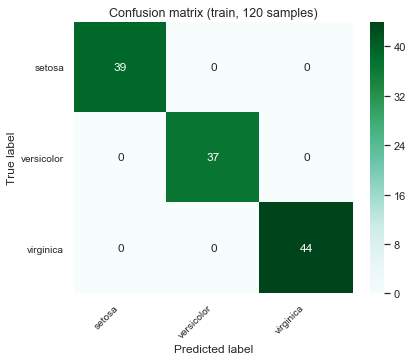

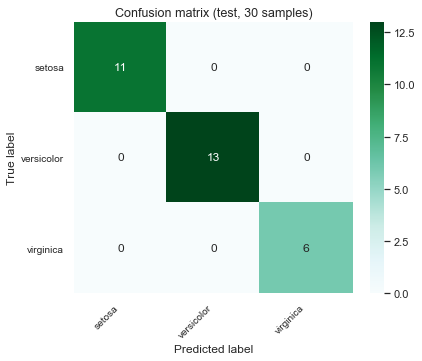

In [26]:
fig = print_confusion_matrix(cmat_train, iris.target_names, plt_title='Confusion matrix (train, 120 samples)')
fig = print_confusion_matrix(cmat_test, iris.target_names, plt_title='Confusion matrix (test, 30 samples)')

### Feature Importance

In [27]:
def plot_feature_importance(clf_rf, df):
    n_features = df.shape[1]
    feature_importances = clf_rf.feature_importances_
    indices = np.argsort(feature_importances)
    
    fig = plt.figure(figsize=(8,6))
    plt.barh(range(n_features), feature_importances[indices], align='center')
    plt.yticks(np.arange(n_features), df.columns[indices])
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    return fig

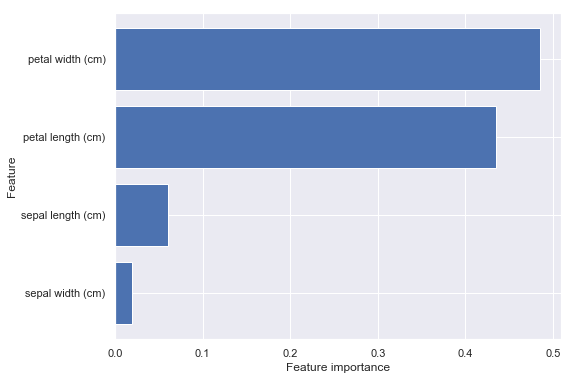

In [28]:
fig = plot_feature_importance(clf_rf, df.drop(['target', 'target_name'], axis=1))

In [29]:
fti = clf_rf.feature_importances_   
df_fti = pd.DataFrame(fti, columns=["feature_importance"], index=iris.feature_names)
df_fti

,feature_importance
sepal length (cm),0.060289
sepal width (cm),0.018788
petal length (cm),0.435465
petal width (cm),0.485458
